In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('data.csv',sep=';')

In [ ]:
sns.distplot(df.Number_of_Purchases,kde=False,color='#6C63FF', hist_kws={"alpha": 1})

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.describe()

Znumber of words and age have to be turned from string into quantitative variables

In [ ]:
# changing the type of variables Age and Znumber_Words_Review to numeric(float)

df.ZNumber_Words_Review = df.ZNumber_Words_Review.str.replace(',','.').astype(float)
df.Age = df.Age.str.replace(',','.').astype(float)

In [ ]:
maxage = np.max(df.Age)
minage = np.min(df.Age)

# Scaling the variable Age to the interval 0-1

for i in range(len(df.Age)):
  df.Age[i] = (df.Age[i] - minage)/(maxage - minage)

In [ ]:
df2 = df.drop(['Number_Words_Review',           # we have standardized version of the same variable
               'Prod_Design_negative',
              'Prod_Technical_negative',        # the value of X_negative can be fully ascertained by the value of X and X_positive (we could have also removed positive for the same reasoning)
              'Prod_Price_negative',
              'Serv_Delivery_negative',
               'Purchase',                      # we can find its value by a simple condition on number of purchases (>0)
               'Review_ID',
               'Category'
               ],                     
              axis=1)

In [ ]:
df2.describe()

In [ ]:
df2.columns

In [ ]:
df2.head()

ex 1

In [ ]:
y = df2.Rating_Score
X = df2.loc[:,df2.columns != 'Rating_Score']

In [ ]:
plt.figure(figsize=(13,10))
corrmat = df.corr()
corrmat2 = abs(corrmat)
sns.heatmap(corrmat)

In [ ]:
y_1 = df3.Rating_Score
X_1 = df3.loc[:,df3.columns != 'Rating_Score']

In [ ]:
X_1 = sm.add_constant(X_1)

In [ ]:
results_1 = sm.OLS(y_1,X_1).fit()
print(results_1.summary())

In [ ]:
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

In [ ]:
df3 = df.drop(['Number_Words_Review',           # we have standardized version of the same variable
               'Purchase',                      # we can find its value by a simple condition on number of purchases (>0)
               'Review_ID',
               'Category'],                     
              axis=1)

y3 = df3.Rating_Score
X3 = df3.loc[:,df3.columns != 'Rating_Score']
X3 = sm.add_constant(X3)
results = sm.OLS(y3, X3).fit()
print(results.summary())

ex 2

In [ ]:
df.head()
df_ex2 = df.drop(['Category','CategoryU','CategoryBoth', 'Country', 'Gender', 'Age','Number_Words_Review','Review_ID','Number_of_Purchases',
                  'Prod_Design_negative','Prod_Technical_negative','Prod_Price_negative','Serv_Delivery_negative',],                     
              axis=1)


In [ ]:
df_ex2.columns

In [ ]:
log_reg = smf.logit("Purchase ~ ZNumber_Words_Review + Prod_Desig + Prod_Design_positive + Prod_Technical + Prod_Technical_positive + Prod_Price + Prod_Price_positive + Sentiment + Rating_Score", data=df_ex2).fit()

In [ ]:
print(log_reg.summary())

Experiment Adding Socio-Demographic Variables in ex2

In [ ]:
df_ex2_2 = df.drop(['Number_Words_Review','Review_ID','Number_of_Purchases',
                  'Prod_Design_negative','Prod_Technical_negative','Prod_Price_negative','Serv_Delivery_negative','Category'],                     
              axis=1)

In [ ]:
log_reg_2 = smf.logit("Purchase ~ ZNumber_Words_Review + Prod_Desig + Prod_Design_positive + Prod_Technical + Prod_Technical_positive + Prod_Price + Prod_Price_positive + Sentiment + Rating_Score + Age + Gender + Country + CategoryU + CategoryBoth", data=df_ex2_2).fit()

In [ ]:
print(log_reg_2.summary())

Ex 3

In [ ]:
sns.displot(df, x='Number_of_Purchases')  #for question 3

In [ ]:
df_ex3 = df2
df_ex3.columns

In [ ]:
poisson = smf.glm(
    "Number_of_Purchases ~ ZNumber_Words_Review + Prod_Desig + Prod_Design_positive + Prod_Technical + Prod_Technical_positive + Prod_Price + Prod_Price_positive + Serv_Delivery + Serv_Delivery_positive + Country + Gender + Age + Sentiment + Rating_Score",
    data=df_ex3,
    family=sm.families.Poisson())


In [ ]:
poisson_results = poisson.fit()
print(poisson_results.summary())

ex4


In [ ]:
df_ex4 = df.drop(['Number_Words_Review',
               'Purchase',                      
               'Review_ID',
               'Category'],                     
              axis=1)
df_ex4.columns

In [ ]:
interactions_model = smf.ols(formula="Rating_Score ~ ZNumber_Words_Review + Prod_Desig + Prod_Technical + Prod_Price + Prod_Design_positive * Prod_Technical_positive + Prod_Price_positive + Serv_Delivery + Serv_Delivery_positive + Country + Gender + Age*Sentiment + Number_of_Purchases + CategoryU + CategoryBoth", data=df_ex4)

In [ ]:
interactions_results = interactions_model.fit()
print(interactions_results.summary())

In [ ]:
# log model with interactions
log_reg_2 = smf.logit("Purchase ~ ZNumber_Words_Review + Prod_Desig + Prod_Technical + Prod_Price + Prod_Design_positive * Prod_Technical_positive + Prod_Price_positive + Sentiment + Rating_Score + Age * Sentiment + Gender + Country + CategoryU + CategoryBoth", data=df_ex2_2).fit()
print(log_reg_2.summary())

In [ ]:
# poisson with interactions
poisson = smf.glm(
    "Number_of_Purchases ~ ZNumber_Words_Review + Prod_Technical + Prod_Desig + Prod_Design_positive * Prod_Technical_positive + Prod_Price + Prod_Price_positive + Serv_Delivery + Serv_Delivery_positive + Country + Gender + Age * Sentiment + Rating_Score + CategoryU + CategoryBoth",
    data=df_ex3,
    family=sm.families.Poisson())
poisson_results = poisson.fit()
print(poisson_results.summary())

### ASSIGNMENT N2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel('Assignment2_balancedpanel.xlsx').set_index(['CustomerID','Month'])

In [ ]:
df.head()

catalog  purchase  ordersize  purtvr  purweb  mailper  \
CustomerID Month                                                          
1.0        0.0        1.0       0.0        0.0     0.0     0.0      0.0   
           1.0        1.0       0.0        0.0     0.0     0.0      0.0   
           2.0        1.0       0.0        0.0     0.0     0.0      0.0   
           3.0        1.0       0.0        0.0     0.0     0.0      0.0   
           4.0        1.0       0.0        0.0     0.0     0.0      0.0   

                  lastordersize  statepur  formerchannelpreference  \
CustomerID Month                                                     
1.0        0.0            49.99       0.0                      1.0   
           1.0            49.99       0.0                      1.0   
           2.0            49.99       0.0                      1.0   
           3.0            49.99       0.0                      1.0   
           4.0            49.99       0.0                      1.0   

                  formerpurchases  ...  timespline3  cexmonth1  cexmail2  \
CustomerID Month                   ...                                     
1.0        0.0                1.0  ...          0.0        0.0       0.0   
           1.0                1.0  ...          0.0        1.0       0.0   
           2.0                1.0  ...          0.0        2.0       0.0   
           3.0                1.0  ...          0.0        3.0       0.0   
           4.0                1.0  ...          0.0        4.0       0.0   

                  cexstpur  cexinitv  cexmin1  cexspl2  cexspl3  cexorlas  \
CustomerID Month                                                            
1.0        0.0         0.0       1.0      1.0      0.0      0.0     49.99   
           1.0         0.0       1.0      1.0      0.0      0.0     49.99   
           2.0         0.0       1.0      1.0      0.0      0.0     49.99   
           3.0         0.0       1.0      1.0      0.0      0.0     49.99   
           4.0         0.0       1.0      1.0      0.0      0.0     49.99   

                  cexmino  
CustomerID Month           
1.0        0.0      49.99  
           1.0      49.99  
           2.0      49.99  
           3.0      49.99  
           4.0      49.99  

[5 rows x 22 columns]

In [ ]:
df.describe()

,catalog,purchase,ordersize,purtvr,purweb,mailper,lastordersize,statepur,formerchannelpreference,formerpurchases,...,timespline3,cexmonth1,cexmail2,cexstpur,cexinitv,cexmin1,cexspl2,cexspl3,cexorlas,cexmino
count,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,...,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000
mean,0.495000,0.106786,12.974189,0.023482,0.088125,0.635000,106.592790,0.109821,0.510436,6.182500,...,0.321429,6.682500,0.312500,0.048929,0.267053,3.010000,0.159107,0.159107,56.212187,43.726709
std,0.499997,0.308854,64.795714,0.151436,0.283489,0.481452,164.879493,0.312681,0.424777,6.613857,...,0.467046,8.824038,0.463533,0.215728,0.403046,5.220856,0.365792,0.365792,141.154722,102.367837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.980000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,59.950000,0.000000,0.500000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,112.010000,0.000000,1.000000,8.000000,...,1.000000,13.000000,1.000000,0.000000,0.500000,4.000000,0.000000,0.000000,59.900000,56.756250
max,1.000000,1.000000,1644.980000,1.000000,1.000000,1.000000,2398.000000,1.000000,1.000000,59.000000,...,1.000000,27.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,2398.000000,1291.256667


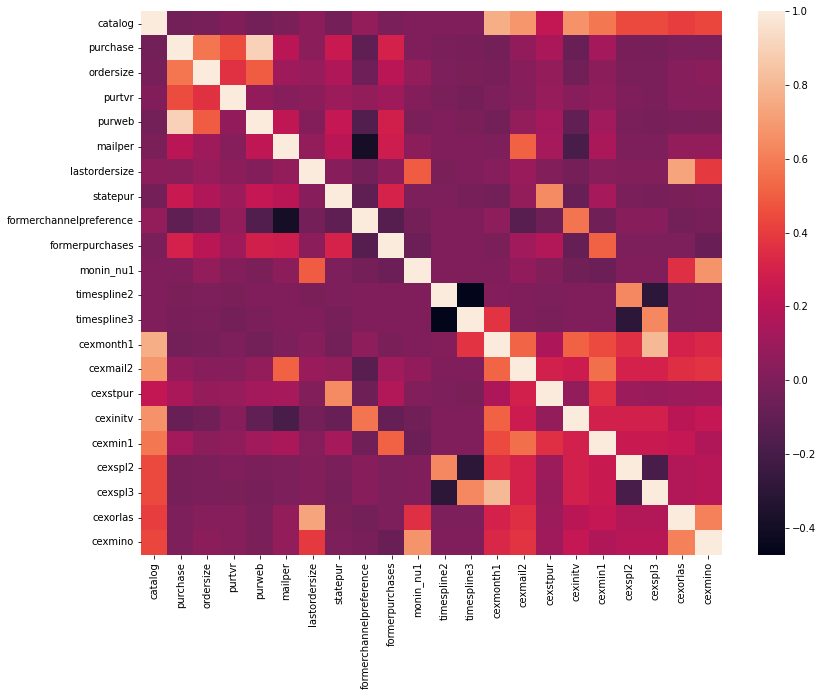

In [ ]:
plt.figure(figsize=(13,10))
corrmat = df.corr()
corrmat2 = abs(corrmat)
sns.heatmap(corrmat)

In [ ]:
df.columns

Index(['catalog', 'purchase', 'ordersize', 'purtvr', 'purweb', 'mailper',
       'lastordersize', 'statepur', 'formerchannelpreference',
       'formerpurchases', 'monin_nu1', 'timespline2', 'timespline3',
       'cexmonth1', 'cexmail2', 'cexstpur', 'cexinitv', 'cexmin1', 'cexspl2',
       'cexspl3', 'cexorlas', 'cexmino'],
      dtype='object')

In [ ]:
model1_interactions = smf.logit(formula="purchase ~ catalog + mailper + statepur + formerchannelpreference + timespline2 + timespline3 + cexmonth1 + cexmail2 + cexstpur + cexinitv + cexspl2 + cexspl3" ,data=df).fit()

Optimization terminated successfully.
         Current function value: 0.298495
         Iterations 8


In [ ]:
model1 = smf.logit(formula="purchase ~ catalog + mailper + statepur + formerchannelpreference + timespline2 + timespline3" ,data=df).fit()

Optimization terminated successfully.
         Current function value: 0.298681
         Iterations 8


ordersize, lastordersize, formerpirchases - we remove them
- size effect
- bias (possible presence in the same month)

- we would insert them scaled (mean-centred *term used by the prof)

In [ ]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                11200
Model:                          Logit   Df Residuals:                    11193
Method:                           MLE   Df Model:                            6
Date:                Tue, 29 Mar 2022   Pseudo R-squ.:                  0.1209
Time:                        07:13:22   Log-Likelihood:                -3345.2
converged:                       True   LL-Null:                       -3805.1
Covariance Type:            nonrobust   LLR p-value:                2.001e-195
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.3745      0.126    -26.815      0.000      -3.621      -3.128
catalog                    -0.2037      0.065     -3.144      0.002      -0.331      -0.077


In [ ]:
print(model1_interactions.summary())

                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                11200
Model:                          Logit   Df Residuals:                    11187
Method:                           MLE   Df Model:                           12
Date:                Tue, 29 Mar 2022   Pseudo R-squ.:                  0.1214
Time:                        07:13:24   Log-Likelihood:                -3343.1
converged:                       True   LL-Null:                       -3805.1
Covariance Type:            nonrobust   LLR p-value:                4.183e-190
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.3964      0.167    -20.393      0.000      -3.723      -3.070
catalog                    -0.0603      0.260     -0.231      0.817      -0.571       0.450


question2

In [ ]:
model2 = smf.ols(formula= 'ordersize ~ catalog + purtvr + purweb + mailper + lastordersize + statepur + formerchannelpreference + formerpurchases + timespline2 + timespline3 + monin_nu1 + cexmonth1 + cexmail2 + cexstpur + cexinitv + cexmin1 + cexspl2 + cexspl3 + cexorlas + cexmino',data=df)
results2 = model2.fit()

In [ ]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              ordersize   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     330.2
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        07:13:26   Log-Likelihood:                -60010.
No. Observations:               11200   AIC:                         1.201e+05
Df Residuals:                   11179   BIC:                         1.202e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

question 3

In [ ]:
tvr_web = np.zeros(shape=df.shape[0])
for i in range(len(tvr_web)):
  if df['purtvr'][i] == 1:
    tvr_web[i] = 1
  elif df['purweb'][i] == 1:
    tvr_web[i] = 2
  else:
    tvr_web[i] = 0

In [ ]:
df['purtvr'][1][1]

0.0